In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

In [3]:
import pandas as pd
df=pd.read_csv('breast-cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['diagnosis']=le.fit_transform(df['diagnosis'])
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
X=df.drop(['diagnosis','id'],axis=1)
Y=df['diagnosis']

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [17]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_pca,Y,test_size=0.2,random_state=42,stratify=Y)

In [38]:
X_train

array([[-8.10413771e-01, -2.65927550e+00],
       [-2.51487642e+00,  1.14252299e-01],
       [-1.35085730e+00,  3.69573902e-01],
       [ 4.94985846e+00,  3.00606413e+00],
       [ 3.06405389e+00, -1.87655235e+00],
       [ 1.22850198e+01, -7.54341017e+00],
       [-2.17446431e+00,  4.96877985e-01],
       [ 1.29619877e+00,  9.13196276e-01],
       [-9.47487892e-01, -1.68475355e+00],
       [ 2.64756863e+00, -3.95117295e+00],
       [ 2.11849693e+00,  2.96629070e-01],
       [ 9.51266984e+00, -5.60348419e+00],
       [-2.68384640e+00,  1.44355553e+00],
       [ 5.38094041e+00, -1.34876978e-01],
       [-3.03248114e+00, -6.49468800e-01],
       [-1.58826397e+00, -1.61965683e+00],
       [-1.42022314e+00,  1.39397811e+00],
       [-6.86940291e-01,  1.69500962e+00],
       [-3.45048854e+00, -4.98218714e-01],
       [-4.87123938e+00, -2.33921479e+00],
       [-3.51864834e+00, -6.58309469e-01],
       [-8.59802986e-01,  9.68485226e-02],
       [ 3.28437262e+00, -9.90673201e-01],
       [ 1.

In [40]:
X_test

array([[-2.96599921,  0.37150648],
       [ 7.14384204, -2.07484223],
       [-0.09610812, -0.12984758],
       [ 0.61628087,  0.63891167],
       [-1.8570859 , -1.57139312],
       [ 1.57293114,  6.50909931],
       [ 0.76526412,  0.88624395],
       [-2.49963637, -2.01853563],
       [-2.81823121,  0.36788398],
       [-1.40877121,  1.50577059],
       [ 3.82443304,  2.30523632],
       [-2.38583566,  2.75765813],
       [ 4.96026812, -1.34112305],
       [-2.01491503,  0.77845213],
       [-0.96719031,  0.43843818],
       [-2.09706917,  3.66709588],
       [-0.36170919,  0.11973909],
       [-3.94347338, -2.03001629],
       [ 0.31443823,  2.07756073],
       [-4.06402566, -1.24616617],
       [-4.08707736, -0.48471008],
       [-1.24976052,  1.59568385],
       [ 4.94358101, -2.84832446],
       [ 2.98534079,  0.75842324],
       [ 0.60760795,  0.16221452],
       [-2.97579879,  1.81097378],
       [-3.83649785,  0.49624993],
       [-0.43286022, -1.3920443 ],
       [ 1.69160792,

In [42]:
Y_train

10     1
170    0
407    0
430    1
27     1
      ..
37     0
415    0
458    0
476    0
335    1
Name: diagnosis, Length: 455, dtype: int32

In [44]:
Y_test

120    0
250    1
375    0
99     1
455    0
      ..
381    0
534    0
448    0
205    1
75     1
Name: diagnosis, Length: 114, dtype: int32

In [46]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear')
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

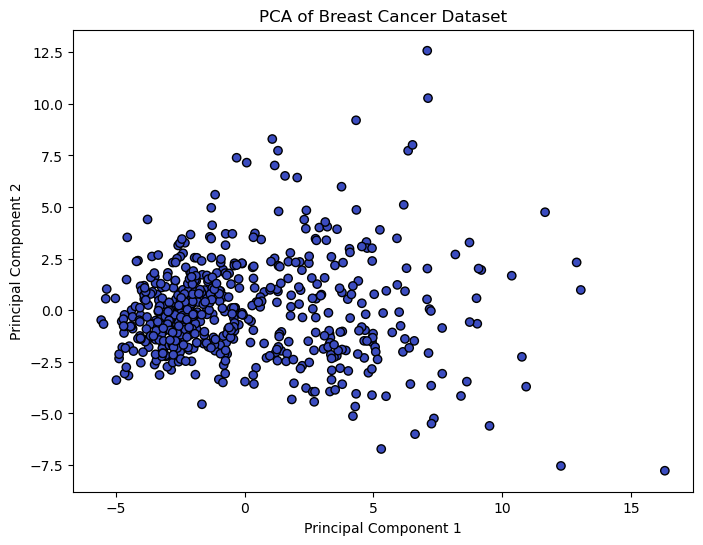

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=(Y == 'M'), cmap='coolwarm', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Breast Cancer Dataset')
plt.show()


In [52]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance preserved:", sum(pca.explained_variance_ratio_))


Explained variance ratio: [0.44272026 0.18971182]
Total variance preserved: 0.6324320765155944
